In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
df.shape

(4269, 13)

In [6]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [7]:
df[' education'].value_counts(dropna=False)

 Graduate        2144
 Not Graduate    2125
Name:  education, dtype: int64

##### Encoding Education Column

In [8]:
education_dict = {'Graduate':1,'Not Graduate':0}
df['education']=np.where(df[' education'].str.contains('Not Graduate',regex = False),0,1)
df[[' education','education']]

,education,education
0,Graduate,1
1,Not Graduate,0
2,Graduate,1
3,Graduate,1
4,Not Graduate,0
...,...,...
4264,Graduate,1
4265,Not Graduate,0
4266,Not Graduate,0
4267,Not Graduate,0


In [9]:
df['education'].value_counts()

1    2144
0    2125
Name: education, dtype: int64

In [10]:
df[' education'].dtype

dtype('O')

In [11]:
df.drop([' education'],axis=1, inplace=True)

In [12]:
df.shape

(4269, 13)

In [13]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.502225
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.500054
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


In [14]:
df[' loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name:  loan_status, dtype: int64

In [15]:
df['self_employed'] = np.where(df[' self_employed'].str.contains('Yes',regex=False),1,0)
df[[' self_employed','self_employed']]

,self_employed,self_employed
0,No,0
1,Yes,1
2,No,0
3,No,0
4,Yes,1
...,...,...
4264,Yes,1
4265,Yes,1
4266,No,0
4267,No,0


In [16]:
df['loan_status']=np.where(df[' loan_status'].str.contains('Rejected',regex=False),0,1)
df[[' loan_status','loan_status']]

,loan_status,loan_status
0,Approved,1
1,Rejected,0
2,Rejected,0
3,Rejected,0
4,Rejected,0
...,...,...
4264,Rejected,0
4265,Approved,1
4266,Rejected,0
4267,Approved,1


In [17]:
df.shape

(4269, 15)

In [18]:
df.drop([' loan_status',' self_employed'],axis=1,inplace=True)

In [19]:
df.shape

(4269, 13)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   loan_id                    4269 non-null   int64
 1    no_of_dependents          4269 non-null   int64
 2    income_annum              4269 non-null   int64
 3    loan_amount               4269 non-null   int64
 4    loan_term                 4269 non-null   int64
 5    cibil_score               4269 non-null   int64
 6    residential_assets_value  4269 non-null   int64
 7    commercial_assets_value   4269 non-null   int64
 8    luxury_assets_value       4269 non-null   int64
 9    bank_asset_value          4269 non-null   int64
 10  education                  4269 non-null   int64
 11  self_employed              4269 non-null   int64
 12  loan_status                4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
education                    0
self_employed                0
loan_status                  0
dtype: int64

In [23]:
df.isna()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,False,False,False,False,False,False,False,False,False,False,False,False,False
4265,False,False,False,False,False,False,False,False,False,False,False,False,False
4266,False,False,False,False,False,False,False,False,False,False,False,False,False
4267,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
df.duplicated().sum()

0

In [25]:
df[df.duplicated()]

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status


Partial and Full Duplicate 

In [26]:
#columns = ['loan_id']
df[df.duplicated(subset='loan_id',keep=False)]

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status


In [27]:
df.duplicated(subset='loan_id',keep=False).sum()

0

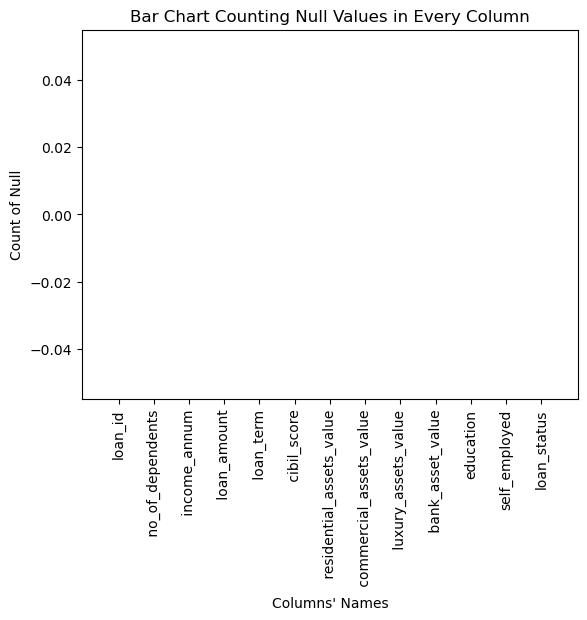

In [28]:
plt.bar(df.columns,height=df.isna().sum())
plt.xticks(rotation=90)
plt.title("Bar Chart Counting Null Values in Every Column")
plt.xlabel("Columns' Names")
plt.ylabel("Count of Null")
plt.show()

([<matplotlib.axis.XTick at 0x79989dad7220>,
 [Text(0, 0, 'Not Gradudate'), Text(1, 0, 'Graduate')])

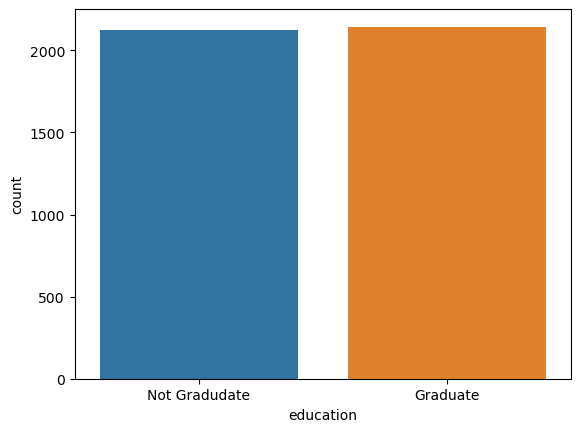

In [29]:
%matplotlib inline

sns.countplot(data=df,x='education')
plt.xticks([0,1],['Not Gradudate','Graduate'])

In [30]:
df.rename(columns={' income_annum':'income_annum'},inplace=True)

In [31]:
df.columns

Index(['loan_id', ' no_of_dependents', 'income_annum', ' loan_amount',
       ' loan_term', ' cibil_score', ' residential_assets_value',
       ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value',
       'education', 'self_employed', 'loan_status'],
      dtype='object')

In [32]:
df.groupby('education')['income_annum'].agg([np.min,np.max,np.mean])

,amin,amax,mean
education,,,
0,200000,9900000,5.026353e+06
1,200000,9900000,5.091604e+06


Text(0.5, 1.0, 'Loan Status for Graduate Applicant')

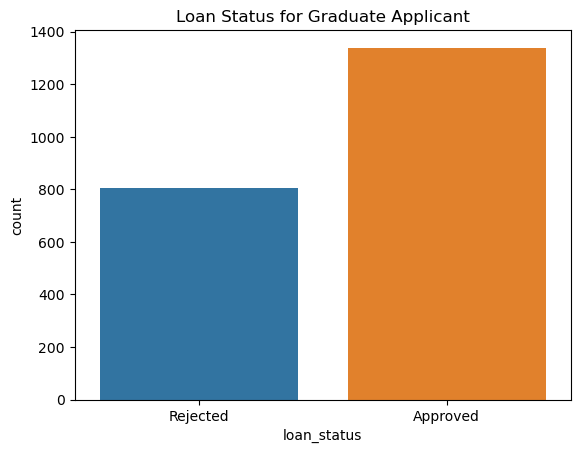

In [33]:
%matplotlib inline

sns.countplot(data=df[df['education']==1],x='loan_status')
plt.xticks([0,1],['Rejected','Approved'])
plt.title('Loan Status for Graduate Applicant')

Text(0.5, 1.0, 'Loan Status for Non-Graduate Applicant')

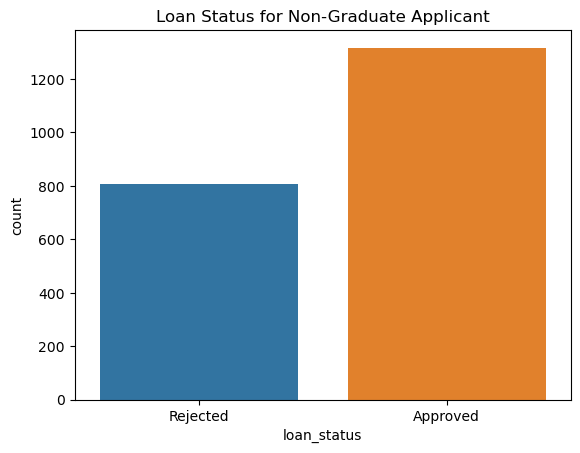

In [34]:
%matplotlib inline

sns.countplot(data=df[df['education']==0],x='loan_status')
plt.xticks([0,1],['Rejected','Approved'])
plt.title('Loan Status for Non-Graduate Applicant')

In [35]:
df.query("education==1 &  income_annum > 5100000").count()

loan_id                      1068
 no_of_dependents            1068
income_annum                 1068
 loan_amount                 1068
 loan_term                   1068
 cibil_score                 1068
 residential_assets_value    1068
 commercial_assets_value     1068
 luxury_assets_value         1068
 bank_asset_value            1068
education                    1068
self_employed                1068
loan_status                  1068
dtype: int64

In [36]:
df['total_assets_value']=df[' residential_assets_value'] + df[' commercial_assets_value'] + df[' luxury_assets_value'] + df[' bank_asset_value']
df.shape

(4269, 14)

In [37]:
df['total_assets_value'].agg(np.mean)

32548770.2037948

In [38]:
df['total_assets_value'].agg(np.min)

400000

In [39]:
df['total_assets_value'].agg(np.max)

90700000

## Renaming Columns by Removing Earlier Space 

In [40]:
df.rename(columns={' no_of_dependents':'no_of_dependents',
                   ' loan_amount':'loan_amount',
                  ' loan_term':'loan_term',' cibil_score':'cibil_score',
                  ' residential_assets_value':'residential_assets_value',
                  ' commercial_assets_value':'commercial_assets_value',
                  ' luxury_assets_value':'luxury_assets_value',
                  ' bank_asset_value':'bank_asset_value'},inplace=True)

In [41]:
df.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education', 'self_employed', 'loan_status', 'total_assets_value'],
      dtype='object')

In [42]:
#Mistakenly Created Total_assests_Group 
#df.drop('Total_assests_Group',axis=1,inplace=True)

Grouping - Ranging Total Assets Value

In [43]:
ranges = [0,10000000,50000000,np.inf]
range_labels = ['0-10M','10M-50M','50M+']

df['Total_assets_Group'] = pd.cut(df['total_assets_value'], bins=ranges, labels=range_labels)

In [44]:
df[['total_assets_value','Total_assets_Group']]

,total_assets_value,Total_assets_Group
0,50700000,50M+
1,17000000,10M-50M
2,57700000,50M+
3,52700000,50M+
4,55000000,50M+
...,...,...
4264,7400000,0-10M
4265,20000000,10M-50M
4266,39000000,10M-50M
4267,28800000,10M-50M


In [45]:
df['Total_assets_Group'].unique()

['50M+', '10M-50M', '0-10M']
Categories (3, object): ['0-10M' < '10M-50M' < '50M+']

In [46]:
df['Total_assets_Group'].value_counts()

10M-50M    2721
50M+        899
0-10M       649
Name: Total_assets_Group, dtype: int64

In [47]:
df['Total_assets_Group'].value_counts(normalize=1)

10M-50M    0.637386
50M+       0.210588
0-10M      0.152026
Name: Total_assets_Group, dtype: float64